In [ ]:
library(tidyverse) 
library(mclust)

In [2]:
veri <- read_csv('Country-data.csv',show_col_types = FALSE)

In [3]:
str(veri)

spc_tbl_ [167 × 10] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ country   : chr [1:167] "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ child_mort: num [1:167] 90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num [1:167] 10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num [1:167] 7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num [1:167] 44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : num [1:167] 1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num [1:167] 9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num [1:167] 56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num [1:167] 5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : num [1:167] 553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...
 - attr(*, "spec")=
  .. cols(
  ..   country = col_character(),
  ..   child_mort = col_double(),
  ..   exports = col_double(),
  ..   healt

In [4]:
summary(veri)

   country            child_mort        exports            health      
 Length:167         Min.   :  2.60   Min.   :  0.109   Min.   : 1.810  
 Class :character   1st Qu.:  8.25   1st Qu.: 23.800   1st Qu.: 4.920  
 Mode  :character   Median : 19.30   Median : 35.000   Median : 6.320  
                    Mean   : 38.27   Mean   : 41.109   Mean   : 6.816  
                    3rd Qu.: 62.10   3rd Qu.: 51.350   3rd Qu.: 8.600  
                    Max.   :208.00   Max.   :200.000   Max.   :17.900  
    imports             income         inflation         life_expec   
 Min.   :  0.0659   Min.   :   609   Min.   : -4.210   Min.   :32.10  
 1st Qu.: 30.2000   1st Qu.:  3355   1st Qu.:  1.810   1st Qu.:65.30  
 Median : 43.3000   Median :  9960   Median :  5.390   Median :73.10  
 Mean   : 46.8902   Mean   : 17145   Mean   :  7.782   Mean   :70.56  
 3rd Qu.: 58.7500   3rd Qu.: 22800   3rd Qu.: 10.750   3rd Qu.:76.80  
 Max.   :174.0000   Max.   :125000   Max.   :104.000   Max.   :82.80  

In [5]:
head(veri)

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [6]:
veri_kullanilacak <- veri[,c(2:10)]
colnames(veri_kullanilacak)

[1] "child_mort" "exports"    "health"     "imports"    "income"    
[6] "inflation"  "life_expec" "total_fer"  "gdpp"

In [7]:
veri_olceklenmis = scale(veri_kullanilacak,center = TRUE, scale = TRUE)
head(veri_olceklenmis)

child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1.2876597,-1.13486665,0.27825140,-0.08220771,-0.80582187,0.1568645,-1.6142372,1.89717646,-0.67714308
-0.5373329,-0.47822017,-0.09672528,0.07062429,-0.37424335,-0.3114109,0.6459238,-0.85739418,-0.48416709
-0.2720146,-0.09882442,-0.96317624,-0.63983800,-0.22018227,0.7869076,0.6684130,-0.03828924,-0.46398018
2.0017872,0.77305618,-1.44372888,-0.16481961,-0.58328920,1.3828944,-1.1756985,2.12176975,-0.51472026
-0.6935483,0.16018613,-0.28603389,0.49607554,0.10142673,-0.5999442,0.7021467,-0.54032130,-0.04169175
-0.5894047,-0.81019144,0.46756001,-1.27594958,0.08067776,1.2409928,0.5897009,-0.38178486,-0.14535428


In [8]:
gmm_model = Mclust(veri_olceklenmis,G=2,modelNames=c("EVV"))

In [9]:
print(gmm_model)

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   


In [10]:
print(gmm_model["bic"])

$bic
[1] -2624.372



In [11]:
print((gmm_model["classification"]))

$classification
  [1] 2 2 2 2 2 1 2 1 1 2 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2
 [38] 2 2 1 2 1 1 1 1 2 2 2 2 1 2 1 2 1 1 2 2 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 2 1
 [75] 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1
[112] 1 2 1 1 1 2 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 2 1 1 1 2 2 1 1 2 2 2 2 1 1 2 2
[149] 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 1 1 2 2



In [12]:
veri["kume"] <- gmm_model["classification"] 
head(veri)

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1


In [13]:
veri %>% count(kume)

kume,n
<dbl>,<int>
1,59
2,108


In [78]:
gmm_model = Mclust(veri_olceklenmis,1:15)
print(paste("En uygun küme sayısı : " , gmm_model["G"]))
print(paste("En uygun kovaryans matris türü :",  gmm_model["modelName"]))
print(paste("En uygun modelin BIC değeri : " , gmm_model["bic"]))

[1] "En uygun küme sayısı :  3"
[1] "En uygun kovaryans matris türü : EVE"
[1] "En uygun modelin BIC değeri :  -2389.84870343254"


In [80]:
veri["kume"] <- gmm_model["classification"] 
veri %>% count(kume)

kume,n
<dbl>,<int>
1,50
2,74
3,43


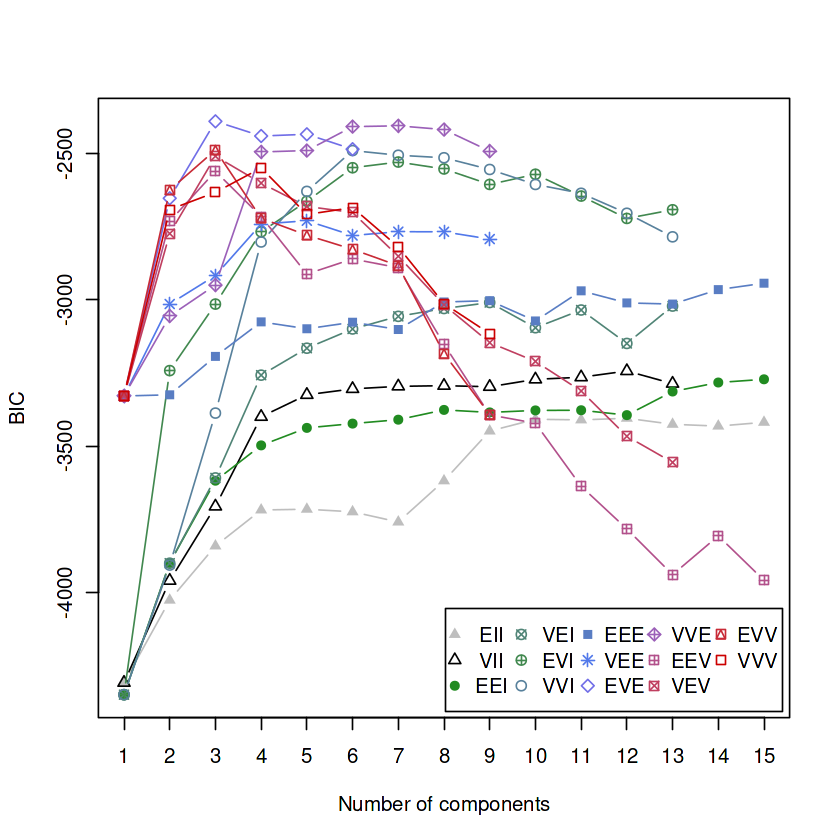

In [87]:
legend_args <- list(x = "bottomright", ncol = 5,x.intersp=4,adj=0.5)
plot(gmm_model, what = 'BIC', legendArgs = legend_args)

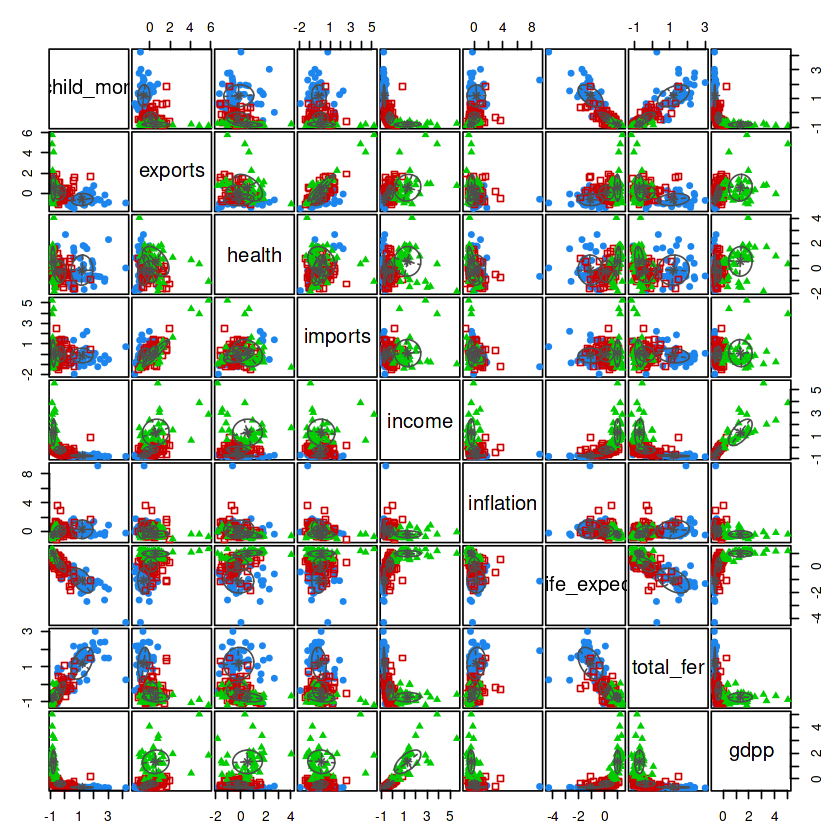

In [90]:
plot(gmm_model, what = 'classification')

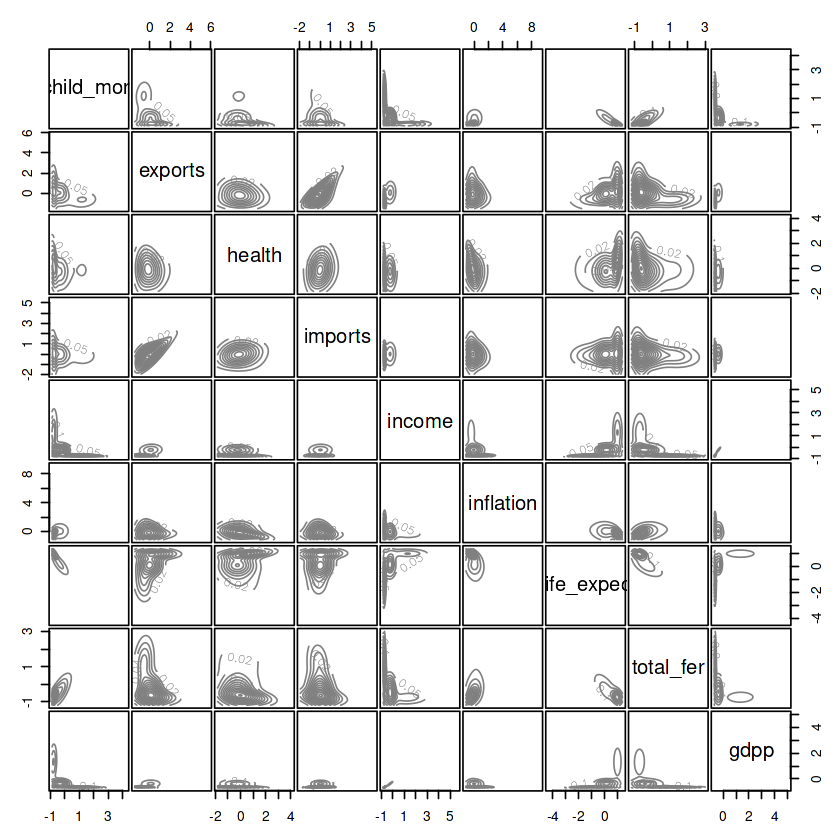

In [91]:
plot(gmm_model, what = 'density')

In [18]:
kume_ortalamalari <- veri %>% group_by(kume)
kume_ortalamalari %>% summarise(
  child_mort  = mean(child_mort ),
  exports = mean(exports ),
  health = mean(health),
  imports = mean(imports),
  income = mean(income),
  life_expec = mean(life_expec),
  total_fer = mean(total_fer),
  gdpp = mean(gdpp),
)

kume,child_mort,exports,health,imports,income,life_expec,total_fer,gdpp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,86.502000,23.97798,6.483000,43.62532,2372.46,60.79800,4.763800,1112.960
2,24.252703,43.67973,6.133514,47.70676,12234.32,71.95946,2.366892,6217.108
3,6.309302,56.60465,8.376512,49.28140,42772.09,79.48605,1.836512,38355.814


In [19]:
filter(veri,kume == 3)

country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,3
Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,3
Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,3
Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,3
Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3
Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,3
Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3
Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,3
Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,3
